#Importing dataset from drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Splitting of training dataset into training and validation

In [ ]:
import os
import numpy as np
import shutil
#for Deviding into test and train set
root_dir = "/content/gdrive/MyDrive/dataset1/"
val_ratio = 0.20
src = root_dir + 'images_prepped_train_val'
allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - val_ratio))])
train_FileNames = [ name for name in train_FileNames.tolist()]
val_FileNames   = [ name for name in val_FileNames.tolist()]

print("***********")
print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print("***********")

for name in train_FileNames:
      img = root_dir + 'images_prepped_train_val/' + name
      shutil.copy(img, root_dir +'images_prepped_train')
      ann = root_dir + 'annotations_prepped_train_val/' + name
      shutil.copy(ann, root_dir + 'annotations_prepped_train')
print("Copying Done!")        
for name in val_FileNames:
      img = root_dir + 'images_prepped_train_val/' + name
      shutil.copy(img, root_dir +'images_prepped_val')
      ann = root_dir + 'annotations_prepped_train_val/' + name
      shutil.copy(ann, root_dir + 'annotations_prepped_val')

print("Copying Done!")

***********
Total images:  367
Training:  293
Validation:  74
***********
Copying Done!
Copying Done!


#Installing library for data augmentation

In [ ]:
!pip uninstall imgaug

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9


#Installing library for Semantic Segmentation

In [ ]:
!pip install keras-segmentation

#Installing libraries

In [ ]:
!pip install q tensorflow==2.2

     |████████████████████████████████| 516.2 MB 4.4 kB/s 
     |████████████████████████████████| 2.9 MB 34.7 MB/s 
     |████████████████████████████████| 3.0 MB 43.8 MB/s 
     |████████████████████████████████| 454 kB 47.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [ ]:
!pip install q keras==2.3.0

     |████████████████████████████████| 377 kB 5.3 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


#Initializing the model

In [ ]:
from keras_segmentation.models.segnet import vgg_segnet

model = vgg_segnet(n_classes=12 ,  input_height=384, input_width=480 )

Using TensorFlow backend.


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# model.train(
#     train_images =  "/content/gdrive/MyDrive/dataset1/images_prepped_train/",
#     train_annotations = "/content/gdrive/MyDrive/dataset1/annotations_prepped_train/",
#     checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
# )

#Training the model

In [ ]:
model.train(
    train_images =  "/content/gdrive/MyDrive/dataset1/images_prepped_train",
    train_annotations = "/content/gdrive/MyDrive/dataset1/annotations_prepped_train",
    input_height=384,
    input_width=480,
    n_classes=12,
    do_augment=True,
    val_images="/content/gdrive/MyDrive/dataset1/images_prepped_val/",
    val_annotations="/content/gdrive/MyDrive/dataset1/annotations_prepped_val/",
    augmentation_name="aug_all",
    epochs=100,
    validate=True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=146,
    val_steps_per_epoch=37,
)

Verifying training dataset


100%|██████████| 293/293 [01:27<00:00,  3.34it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 74/74 [00:23<00:00,  3.12it/s]


Dataset verified! 
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


146/146 [==============================] - 146s 1s/step - loss: 1.7122 - accuracy: 0.5144 - val_loss: 2.5024 - val_accuracy: 0.4547
Epoch 2/100
146/146 [==============================] - 121s 826ms/step - loss: 1.2940 - accuracy: 0.5902 - val_loss: 1.8003 - val_accuracy: 0.5538
Epoch 3/100
146/146 [==============================] - 132s 902ms/step - loss: 1.2485 - accuracy: 0.6097 - val_loss: 1.4269 - val_accuracy: 0.6106
Epoch 4/100
146/146 [==============================] - 127s 871ms/step - loss: 1.2437 - accuracy: 0.6104 - val_loss: 1.2354 - val_accuracy: 0.6326
Epoch 5/100
146/146 [==============================] - 120s 824ms/step - loss: 1.1414 - accuracy: 0.6364 - val_loss: 1.5305 - val_accuracy: 0.5791
Epoch 6/100
146/146 [==============================] - 125s 855ms/step - loss: 1.1855 - accuracy: 0.6254 - val_loss: 1.7628 - val_accuracy: 0.5101
Epoch 7/100
146/146 [==============================] - 120s 819ms/step - loss: 1.1750 - accuracy: 0.6252 - val_loss: 1.2114 - val_acc

#Prediction of the model

In [ ]:
output = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07961.png",
    out_fname="/content/drive/MyDrive/dataset1/predicted_image_folder/output.png"
)

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

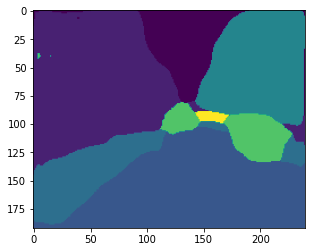

In [ ]:
plt.imshow(output)

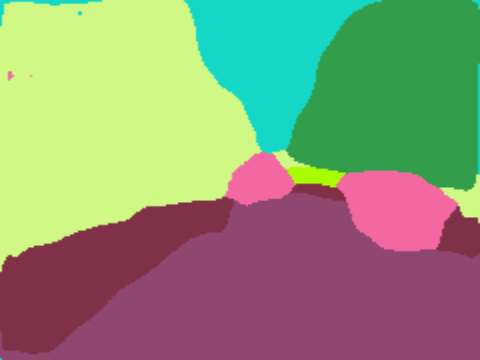

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dataset1/predicted_image_folder/output.png")

In [ ]:
o = model.predict_segmentation(
    inp="/content/drive/MyDrive/dataset1/images_prepped_test/0016E5_07961.png",
    out_fname="/content/drive/MyDrive/dataset1/predicted_image_folder/output.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]
)

#Overlayed image

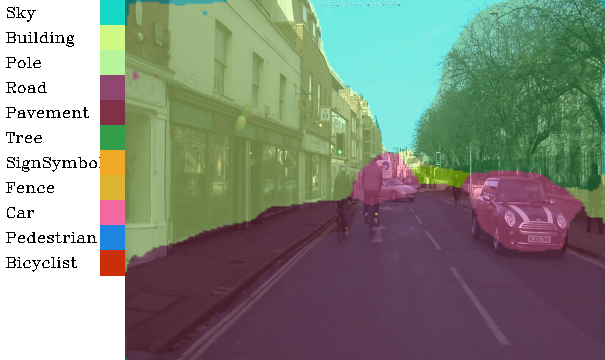

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dataset1/predicted_image_folder/output.png")